In [1]:
# get imports
import numpy as np
import keras
import tensorflow as tf

from keras.preprocessing.image import img_to_array, ImageDataGenerator
from PIL import Image
import time
import math
from keras import layers
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the contents of a txt file to an archive dictionary
def importArchiveTxt(fpath):
    all_arcs = []
    temp_arc = {}
    
    #open, read, and close file
    f = open(fpath, 'r')
    entries = f.readlines()
    f.close()
    
    #add each line as an entry to the archive
    for e in entries:
        if "~ ~ ~" in e:
            all_arcs.append(temp_arc)
            temp_arc={}
            continue
            
        ep = e.split(":")
        binnum = ep[0]
        #print(binnum)
        x = ep[1]
        
        temp_arc[binnum]=[float(i) for i in x.split(",")]
        
        
    return all_arcs

#get the archive file by a string match
def getMatchArchiveFile(files,mstr):
    for f in files:
        if mstr in f:
            return f
    return None   #no match found

#set archive path
def getArchivePath(EXP_NUM,FMR,arc_date):
    arc_dir_path = f"sp-exp_archive-out/[EXP {EXP_NUM}] ({arc_date})"
    arc_files = [os.path.join(arc_dir_path, f) for f in os.listdir(arc_dir_path) if os.path.isfile(os.path.join(arc_dir_path, f))]
    arc_fmr_file = getMatchArchiveFile(arc_files,f"fmr-{FMR}")
    return arc_fmr_file



In [3]:
GENERATOR = None

#import the variational autoencoder
def import_VAE(dataset,vae_size):
    return keras.models.load_model(f"autoencoder_models/print_{dataset}_var_decoder-{vae_size}.h5")    # change this to the path of your own model

#create a single sample using the generator given an input latent vector
def generateSample(x):
    xs = np.array(x)
    if(len(xs.shape)==1):   #assume 1d
        xs = np.expand_dims(xs,axis=0)
        
    return np.array(GENERATOR(xs,training=False)[0])

In [4]:
def showSamples(imgs,title, subtitle=None):
    n = len(imgs)
    s = int(math.sqrt(n))
    #w = math.ceil(n/s)
    w = 10
    plt.figure(figsize=(20,5))
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(s,w,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.array(imgs[i]).squeeze(),cmap='binary')
        if subtitle:
            plt.xlabel(subtitle[i])
        #plt.title(subtitle[i])
    plt.show()

111101101011111111101011101101101111110111111111111110111111111111101110110101110010111111111101111111101001110111111011111111111111100011111101111101111110111111011011000101000100001100011111111010111101111111101010111111111111011010110100111110101101111101101101111111111110111111111111101110011111111111101011111111101111101011111100111011110101111111111111
111111101011111101010011101101101100111010111101011011111111111111100110111101110110111111110110011111110010101010111011111111111111110011101101111111111011111111110111100011101110101111111111111111111111101111101110111111011010001001111101111011110111101011111111111101101111111110111111101110111111111111111111110111111111110111101011101111111110111111010111
11110111111011110101010100101111111100101111110011110111101111111100011011110100111010111011111101111111101110110111111101111111100111011101110111111111111001101111011111011101101101110111011111101011101111111110111001011111110011111011110111011110011111101111101111111110111111

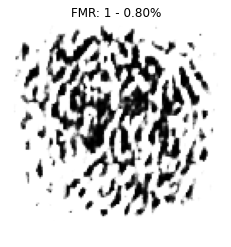

001000000000000100000000000101001110111011111100001000010100000000100100000000111000100010000000000101000100000000011001100000001001000010000000010001000000101001110000000000000000000000010000000010000001000000100110001111111000000100001101111001100010000000001011101101001010100010100100000010010111100000000010000010001000000010001000100000000000100000010111
000000010000100000000000000100000001000010011100001000010000000000100100011001010000001000000011000100011000000000000001000010000001000001101001010100010010000000000000000000000000000000000100100000011000011000101010100000001000001000000000110000010001000001101110000100100100101110001000100000110111000100010010001011000000000011000000001100010010000000010011
00001000000000010100000100011110111011101001110000010001100010001010000000000001001100010010000000000000000000100011101100101000100100001010100000010000000000000011010000000000000000000000000110000111000100110011101000001001110000100000000101101010100000000000100111011101100010

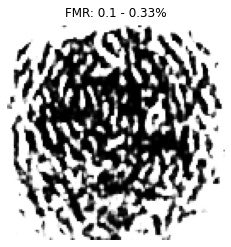

000000000000100000000000000000000010010010010100000000000000000000000000000000000000000000000000000000000000000000000000000010001000000010000100000000000000001001000000000000000000000000000000000000000001001000001000000001001000000000000000000000000000000000000000000000000000100000000000000000000000100000000010000000000000000010000000000000000000100000010001
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000100001000000000000000000010000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

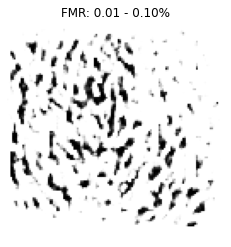

In [16]:
FMRs = [1,0.1,0.01]
GENERATOR = import_VAE("CAPACITIVE",32)

arc_date = "14-Feb-2022"
EXPS = {1: "DeepMasterPrints", 2: "Subprints", 3: "Novelty Prints", 4:"Random Prints"}
EXP_NUM = 1

#show all the images from the archive
for FMR in FMRs:
    archive_path = getArchivePath(EXP_NUM, FMR, arc_date)
    ARCHIVE_SET = importArchiveTxt(archive_path)
    
    if EXP_NUM == 1:
        print_set = []
        
        #go through each archive set
        cov_arc = []
        for a in ARCHIVE_SET:
            ARCHIVE = a
            for k,z in ARCHIVE.items():
                gen_print = generateSample(z)
                print_set.append(gen_print)
                print(k)
                cov_arc.append(str(k).count("1"))

        best_cov = np.argmax(np.array(cov_arc))
                
        #show the sample set
        plt.axis('off')
        plt.imshow(print_set[best_cov].squeeze(),cmap='binary')
        plt.title(f"FMR: {FMR} - {cov_arc[best_cov]/360:.2f}%")
        plt.show()
        
    else:
        print_set = []
        #get the best archive
        cov_arc = []
        for a in ARCHIVE_SET:
            coverage = int('0',2)
            for k in a.keys():
                coverage = int(bin(int(k,2) | coverage),2)
            cov_arc.append(bin(coverage).count("1"))
                
        best_trial = np.argmax(cov_arc)
            
        ARCHIVE = ARCHIVE_SET[best_trial]
        #print([len(x) for x in ARCHIVE_SET])
        for k,z in ARCHIVE.items():
            gen_print = generateSample(z)
            print_set.append(gen_print)
            

        #show the sample set
        showSamples(print_set,f"{EXPS[EXP_NUM]} - FMR: {FMR} - {cov_arc[best_trial]/360:.2f}%",None)

In [7]:
# show classifier
CLASSIFIER_MODEL=keras.models.load_model('multiclass_models/print_multiclassifier_720.h5') # change the path to your model

In [29]:
FMRs = [1,0.1,0.01]
GENERATOR = import_VAE("CAPACITIVE",32)

arc_date = "26-Jan-2022"
EXPS = {1: "DeepMasterPrints", 2: "Subprints", 3: "Novelty Prints", 4:"Random Prints"}
EXP_NUM = 1

#show all the images from the archive
for FMR in FMRs:
    archive_path = getArchivePath(EXP_NUM, FMR, arc_date)
    ARCHIVE_SET = importArchiveTxt(archive_path)
    
    if EXP_NUM == 1:
        print_set = []
        
        #go through each archive set
        comb_users = None
        for a in ARCHIVE_SET:
            ARCHIVE = a
            for k,z in ARCHIVE.items():
                gen_print = generateSample(z)
                print_set.append(gen_print)
                
                if not comb_users:
                    comb_users = int(k,2)
                else:
                    comb_users = int(k,2) | comb_users
        print(str(bin(comb_users)).count("1"))

        

342
162
29
